In [ ]:
import pandas as pd
data=pd.read_csv('/content/삼성전자.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6000 non-null   object 
 1   Open    6000 non-null   int64  
 2   High    6000 non-null   int64  
 3   Low     6000 non-null   int64  
 4   Close   6000 non-null   int64  
 5   Volume  6000 non-null   int64  
 6   Change  5999 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 328.2+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Change
0,2000-04-27,5520,5700,5400,5400,1082253,NaN
1,2000-04-28,5500,6100,5460,6000,1510624,0.111111
2,2000-05-02,6200,6530,6120,6280,1446713,0.046667
3,2000-05-03,6240,6260,6090,6180,531786,-0.015924
4,2000-05-04,6220,6360,6140,6180,522021,0.000000


In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Change
count,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,5999.000000
mean,29394.442500,29679.904333,29095.146333,29409.338333,4.467358e+06,0.000676
std,22990.469332,23171.772351,22786.980066,22963.285256,7.930200e+06,0.021267
min,0.000000,0.000000,0.000000,2730.000000,0.000000e+00,-0.137566
25%,11100.000000,11240.000000,10980.000000,11120.000000,2.943078e+05,-0.010730
50%,23030.000000,23290.000000,22760.000000,23080.000000,5.041160e+05,0.000000
75%,46450.000000,46862.500000,46000.000000,46457.500000,6.785322e+06,0.011611
max,90300.000000,96800.000000,89500.000000,91000.000000,9.030618e+07,0.150000


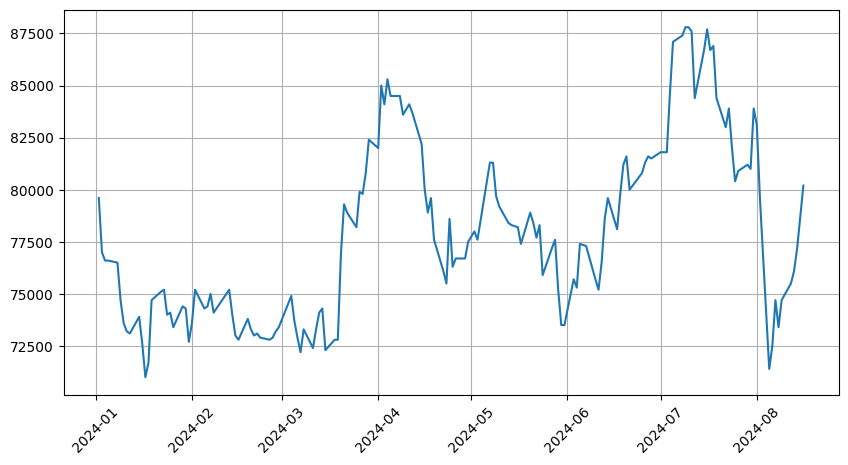

In [ ]:
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data = data[data['Date'].dt.year == 2024]

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
!pip install statsmodels

from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Close'])
result

(-2.1843130882392408,
 0.21198808300285021,
 0,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 2449.6626417974458)

In [ ]:
!python -m pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


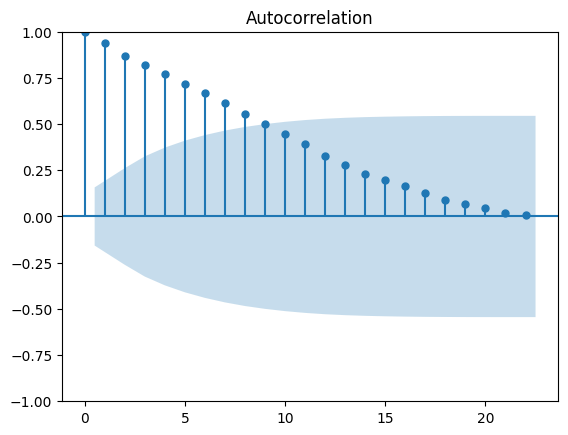

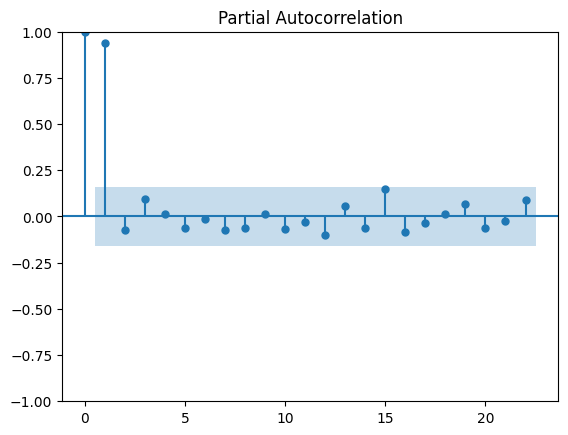

In [ ]:
# 일일 종가의 자기상관함수 & 편자기상관함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close'])
plot_pacf(data['Close'])
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


             Open        High         Low       Close      Volume     Change
count  154.000000  154.000000  154.000000  154.000000  154.000000  76.000000
mean     0.000099    0.000032    0.000041    0.000049    0.001257        NaN
std      0.018213    0.016300    0.018194    0.019534    0.381402        NaN
min     -0.059898   -0.056869   -0.124409   -0.108716   -1.487166       -inf
25%     -0.008564   -0.008513   -0.009592   -0.010554   -0.242815  -1.142495
50%     -0.001355    0.000000    0.001345    0.000000   -0.012434  -0.305879
75%      0.010141    0.008462    0.008666    0.010837    0.227326   0.618130
max      0.071973    0.055940    0.056931    0.054790    1.343795        inf


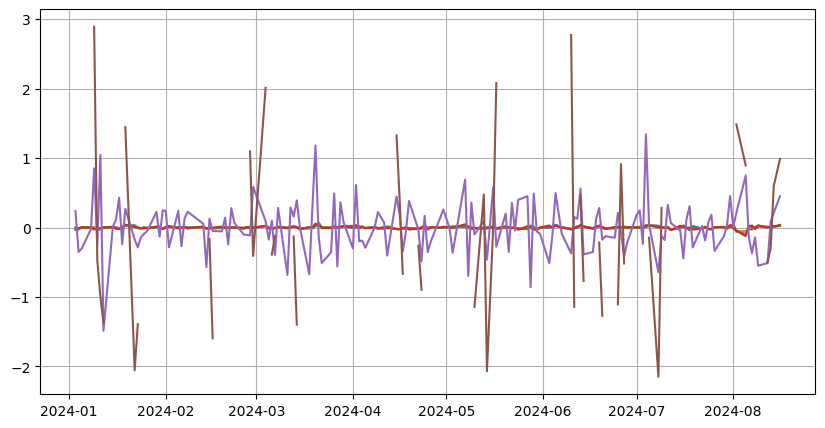

In [ ]:
datapct = data[['Open','High','Low','Close','Volume','Change']].pct_change()
log_data = np.log(1 + datapct)
log_data.head()

print(log_data.describe())

plt.figure(figsize=(10,5))
plt.plot(data['Date'], log_data)
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
log_data = log_data.dropna()
result = adfuller(log_data['Close'])
result

(-4.374632296775068,
 0.0003290672855818395,
 4,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 -300.875675489529)

-> 즉 정상시계열

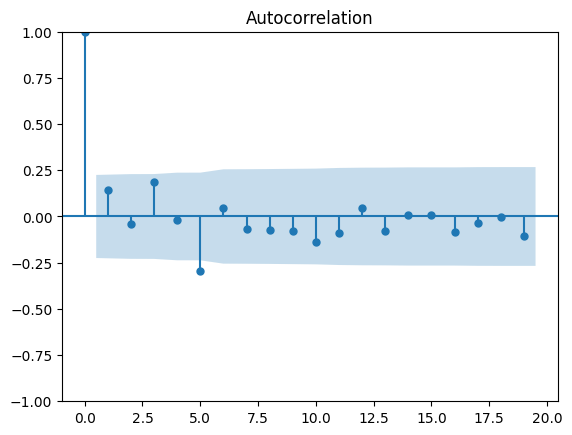

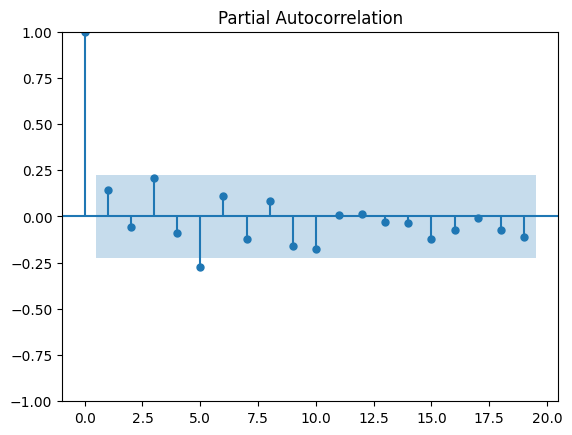

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 일일 로그수익률의 acf & pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(log_data['Close'])
plot_pacf(log_data['Close'])
plt.show()
print(type(log_data))

In [ ]:
log_data

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Open,High,Low,Close,Volume,Change
5847,-0.031050,-0.019219,-0.011757,-0.005208,-0.350332,-1.838594
5848,0.007853,-0.002591,0.003934,0.000000,-0.304264,-inf
5850,0.005181,0.002577,-0.027872,-0.023811,0.852908,2.891678
5851,-0.031499,-0.032704,-0.014916,-0.014835,-0.250211,-0.468666
5852,-0.028399,-0.021506,-0.006854,-0.005450,1.046481,-0.996766
...,...,...,...,...,...,...
5993,-0.025694,0.009253,0.006892,0.029894,-0.368715,0.677858
5996,-0.006627,0.001318,0.008054,0.010653,-0.510183,-0.503064
5997,0.017140,0.009180,0.009315,0.007916,0.085382,-0.298335
5998,0.011696,0.015544,0.019673,0.014351,0.211946,0.598220


In [ ]:
log_data2 = log_data['Close'].values
log_data2=log_data2.reshape(1,-1)
print(log_data2.shape)

(1, 76)


In [ ]:
inte = 24
X=[]
y=[]
for i in range(log_data2.shape[1]):
    if i + inte > log_data2.shape[1] - 1:
        break
    else:
         xx=log_data2[0, i : i + inte]
         X.append(xx)
         yy=log_data2[0, i + inte]
         y.append(yy)

In [ ]:
print(type(X))
print(type(y))
X=np.asarray(X)
y=np.asarray(y)
print(X.shape)
print(y.shape)

<class 'list'>
<class 'list'>
(52, 24)
(52,)


In [ ]:
# 시계열 순서를 유지하는 x_train, x_test, y_train, y_test를 정의
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41, 24)
(11, 24)
(41,)
(11,)


In [ ]:
!pip install tensorflow==2.0.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0)
ERROR: No matching distribution found for tensorflow==2.0.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras import regularizers

model1=Sequential()
model1.add(Dense(1, input_shape=(24,)))
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model1.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc=model1.evaluate(X_train, y_train)
los_test=model1.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - loss: 0.0012 - mae: 0.0270
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - mae: 0.0258
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mae: 0.0272 
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0256 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - mae: 0.0266
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - mae: 0.0259
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011 - mae: 0.0264
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011 - mae: 0.0262
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0264 
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0011 - mae: 0.0264  
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010 - mae: 0.0257     
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011 - mae: 0.0263 
Epoch 13/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (212.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27 (112.00 B)

In [ ]:
# MLP 모형에 은닉층 하나 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM

model2=Sequential()
model2.add(Dense(32,activation='relu',input_shape=(24,)))
model2.add(Dense(1))

model2.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model2.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc=model2.evaluate(X_train, y_train)
los_test=model2.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - loss: 5.7970e-04 - mae: 0.0191
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7448e-04 - mae: 0.0176
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4258e-04 - mae: 0.0166 
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9821e-04 - mae: 0.0157 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0643e-04 - mae: 0.0158 
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8579e-04 - mae: 0.0155 
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8536e-04 - mae: 0.0153 
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3985e-04 - mae: 0.0144 
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2993e-04 - mae: 0.0140 
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.8833e-04 - mae: 0.0131 
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.1039e-04 - mae: 0.0139 
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0638e-04 - mae: 0.0137 
Epoch 13/30
2

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,668 (6.52 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 835 (3.27 KB)

In [ ]:
# LSTM 모형 적용
X_train=X_train.reshape(-1,1,24)
X_test=X_test.reshape(-1,1,24)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM

model3 = Sequential()
model3.add(LSTM(32, input_shape=(1,24)))
model3.add(Dense(1))
model3.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model3.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc = model3.evaluate(X_train, y_train)
los_test = model3.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.4255e-04 - mae: 0.0138
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4439e-04 - mae: 0.0138 
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4705e-04 - mae: 0.0145 
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4665e-04 - mae: 0.0140 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4888e-04 - mae: 0.0139 
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3297e-04 - mae: 0.0135
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4146e-04 - mae: 0.0141 
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3479e-04 - mae: 0.0143 
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4026e-04 - mae: 0.0138 
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3785e-04 - mae: 0.0137 
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1664e-04 - mae: 0.0134 
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3834e-04 - mae: 0.0140 
Epoch 13/30
2

In [ ]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           7,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,660 (57.27 KB)

 Trainable params: 7,329 (28.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,331 (28.64 KB)

In [ ]:
# GRU 모형 적용
model4 = Sequential()
model4.add(GRU(32, input_shape=(1,24)))
model4.add(Dense(1))
model4.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model4.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc=model4.evaluate(X_train, y_train)
los_test=model4.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.3534e-04 - mae: 0.0168
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.3371e-04 - mae: 0.0163 
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1651e-04 - mae: 0.0157
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7255e-04 - mae: 0.0177
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2712e-04 - mae: 0.0163
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7936e-04 - mae: 0.0175
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.2697e-04 - mae: 0.0160
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0605e-04 - mae: 0.0159
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.9747e-04 - mae: 0.0156
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9831e-04 - mae: 0.0157
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.0406e-04 - mae: 0.0159
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.0501e-04 - mae: 0.0153
Epoch 13/30


In [ ]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 32)                  │           5,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,204 (43.77 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,603 (21.89 KB)

In [ ]:
# GRU 모형에 층 추가 적용
model5 = Sequential()
model5.add(GRU(32, input_shape=(1,24)))
model5.add(Dense(16))
model5.add(Dense(8))
model5.add(Dense(1))
model5.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model5.fit(X_train, y_train, epochs=30, batch_size=32)
loss_acc = model5.evaluate(X_train, y_train)
los_test = model5.evaluate(X_test, y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.8503e-04 - mae: 0.0188
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0854e-04 - mae: 0.0198 
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5733e-04 - mae: 0.0183 
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0198e-04 - mae: 0.0169 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1878e-04 - mae: 0.0156 
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4215e-04 - mae: 0.0148 
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2751e-04 - mae: 0.0143 
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9647e-04 - mae: 0.0188
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010 - mae: 0.0268
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4732e-04 - mae: 0.0144 
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.2670e-04 - mae: 0.0148
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4714e-04 - mae: 0.0196 
Epoch 13/30
2/2 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6219e-04 - mae: 0.0248  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0016 - mae: 0.0364
[0.0008762248326092958, 0.02504844404757023]
[0.00156437570694834, 0.03638186678290367]
